# Lending Club Data Exploration
As a fun little exercise, I decided to download the available data from Lending Club's website.

In [9]:
import pandas as pd,sqlite3
%matplotlib inline

In [2]:
con=sqlite3.connect('C:\\Users\\Jonathan\\Desktop\\database\\lendingclub.db')

In [3]:
query = """
SELECT *
FROM LoanStats3a
"""

query2 = """
SELECT *
FROM RejectStatsA
"""

In [4]:
loan= pd.read_sql(query,con)
reject = pd.read_sql(query2,con)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,,,,,0,0,,,,
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,,,,,0,0,,,,
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,,,,,0,0,,,,
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,,,,,0,0,,,,
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,,,,,0,0,,,,


In [6]:
reject.head()

,AmountRequested,ApplicationDate,LoanTitle,Risk_Score,Debt-To-IncomeRatio,ZipCode,State,EmploymentLength,PolicyCode
0,1000,5/26/2007,Wedding Covered but No Honeymoon,693,10%,481xx,NM,4 years,0
1,1000,5/26/2007,Consolidating Debt,703,10%,010xx,MA,< 1 year,0
2,11000,5/27/2007,Want to consolidate my debt,715,10%,212xx,MD,1 year,0
3,6000,5/27/2007,waksman,698,38.64%,017xx,MA,< 1 year,0
4,1500,5/27/2007,mdrigo,509,9.43%,209xx,MD,< 1 year,0


In [7]:
for col in list(reject.columns.values): print col

AmountRequested
ApplicationDate
LoanTitle
Risk_Score
Debt-To-IncomeRatio
ZipCode
State
EmploymentLength
PolicyCode


In [8]:
for col in list(loan.columns.values): print col

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

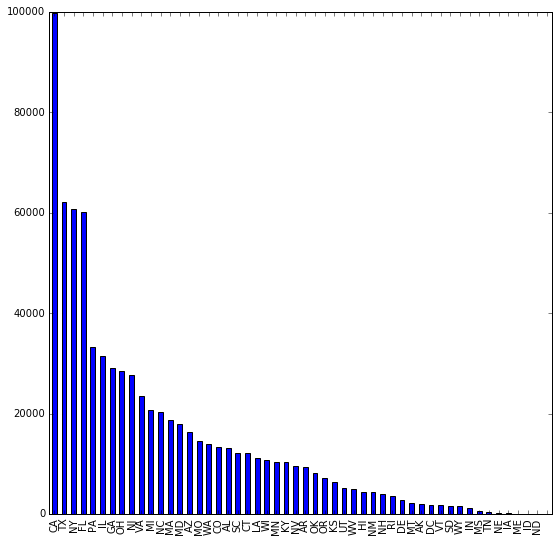

In [10]:
reject.State.value_counts('ApplicationDate').apply(lambda x:x*len(reject)).plot(kind='bar',figsize=(9,9))
#Most of the rejections are coming from California
#2nd is TX, 3rd NY, 4th FL

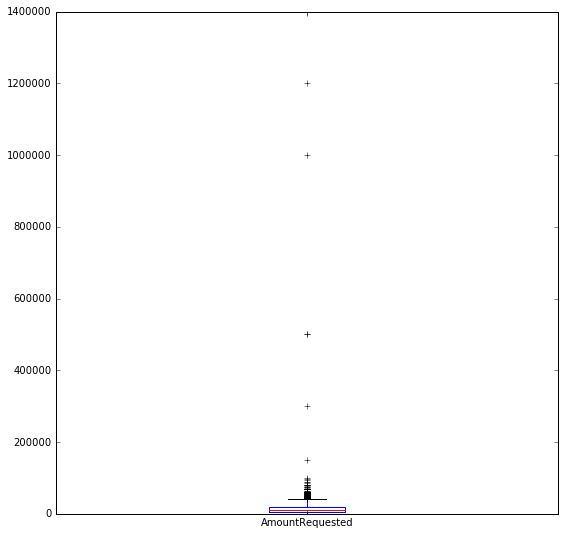

In [11]:
reject.AmountRequested = pd.to_numeric(reject.AmountRequested,errors='coerce')
reject.AmountRequested.plot(kind='box',figsize=(9,9))
#Million dollar loans requested...wow

In [12]:
reject.AmountRequested.describe()
# 0 dollars requested?

reject[reject.AmountRequested==0]
#Aw, no interesting loan title

,AmountRequested,ApplicationDate,LoanTitle,Risk_Score,Debt-To-IncomeRatio,ZipCode,State,EmploymentLength,PolicyCode
531884,0.0,6/7/2012,,677,32.28%,029xx,RI,< 1 year,0
594623,0.0,8/15/2012,,685,44.04%,271xx,NC,< 1 year,0


In [13]:
reject[reject.AmountRequested==reject.AmountRequested.max()]
#That's a pretty expensive car haha

,AmountRequested,ApplicationDate,LoanTitle,Risk_Score,Debt-To-IncomeRatio,ZipCode,State,EmploymentLength,PolicyCode
157454,1400000.0,9/10/2010,car,641,47.55%,295xx,SC,2 years,0
